In [1]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
print('CLass labels:',np.unique(y))

CLass labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=1,stratify=y)

In [3]:
print('Labels counts in y:',np.bincount(y))
print('Labels counts in y_train:',np.bincount(y_train))
print('Labels counts in y_test:',np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(max_iter=40,eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
y_pred=ppn.predict(X_test_std)
print('Misclassified samples:%d'%(y_test!=y_pred).sum())

Misclassified samples:1


In [7]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

Accuracy:0.98


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]


        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

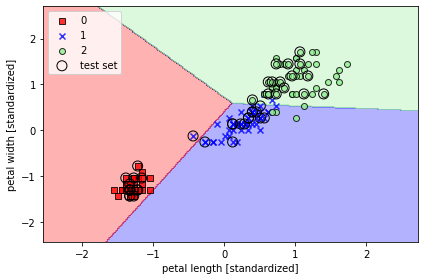

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('1_perceptron.png', dpi=300)
plt.show()

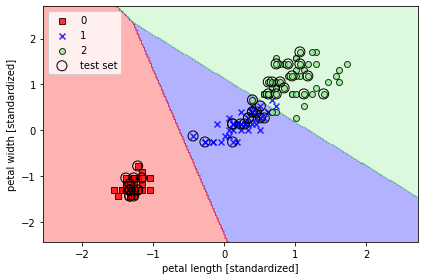

Misclassified samples:1
Accuracy:0.98


In [10]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1,solver='liblinear'
                        ,multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('2_multiclass.png', dpi=300)
plt.show()
y_pred=lr.predict(X_test_std)
print('Misclassified samples:%d'%(y_test!=y_pred).sum())
print('Accuracy:%.2f'%lr.score(X_test_std,y_test))

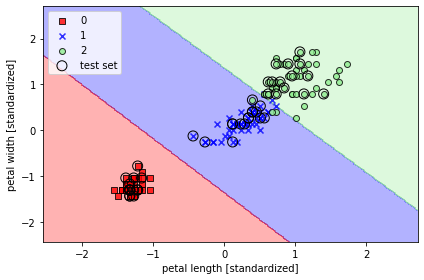

Misclassified samples:1
Accuracy:0.98


In [11]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('3_svmlinear.png', dpi=300)
plt.show()
y_pred=svm.predict(X_test_std)
print('Misclassified samples:%d'%(y_test!=y_pred).sum())
print('Accuracy:%.2f'%svm.score(X_test_std,y_test))

In [12]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron', max_iter=1000)
lr = SGDClassifier(loss='log', max_iter=1000)
svm = SGDClassifier(loss='hinge', max_iter=1000)

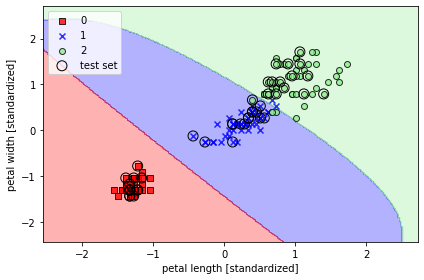

Misclassified samples:1
Accuracy:0.98


In [13]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('4_svmkernal.png', dpi=300)
plt.show()
y_pred=svm.predict(X_test_std)
print('Misclassified samples:%d'%(y_test!=y_pred).sum())
print('Accuracy:%.2f'%svm.score(X_test_std,y_test))

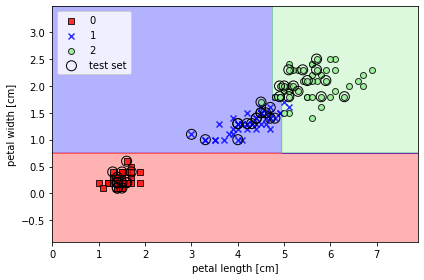

Misclassified samples:1
Accuracy:0.98


In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('5_decisiontree.png', dpi=300)
plt.show()
y_pred=tree.predict(X_test)
print('Misclassified samples:%d'%(y_test!=y_pred).sum())
print('Accuracy:%.2f'%tree.score(X_test,y_test))

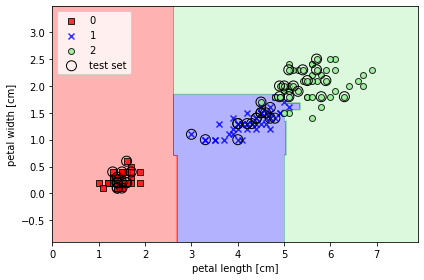

Misclassified samples:1
Accuracy:0.98


In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('6_randomforests.png', dpi=300)
plt.show()
y_pred=forest.predict(X_test)
print('Misclassified samples:%d'%(y_test!=y_pred).sum())
print('Accuracy:%.2f'%forest.score(X_test,y_test))

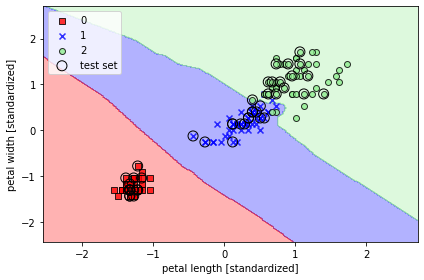

Misclassified samples:0
Accuracy:1.00


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('7_knearestneighbors.png', dpi=300)
plt.show()
y_pred=knn.predict(X_test_std)
print('Misclassified samples:%d'%(y_test!=y_pred).sum())
print('Accuracy:%.2f'%knn.score(X_test_std,y_test))